In [1]:
import pickle
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append('..')
from utils.util import *
sns.set_theme()
sns.set_style("darkgrid")
# sns.set_context("paper")
sns.set_context("talk")

In [39]:
ctx_order = 'last'
ctx_order_str = 'ctxL'
analyze_name = 'calc_ratio'

In [48]:
with open('../../results/%s_results_mlp.P' %(analyze_name), 'rb') as f:
    mlp_results = pickle.load(f)

with open('../../results/%s_%s_results_rnn.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results = pickle.load(f)

with open('../../results/%s_%s_results_rnncell_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results = pickle.load(f)

# with open('../../results/%s_results_stepwisemlp.P' %(analyze_name), 'rb') as f:
with open('../../results/%s_results_truncated_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_results = pickle.load(f)


In [49]:
mlp_runs     = dict_to_list(mlp_results, analyze_name)
rnn_runs     = dict_to_list(rnn_results, analyze_name)
rnncell_runs = dict_to_list(rnncell_results, analyze_name)
swmlp_runs   = dict_to_list(swmlp_results, analyze_name)

In [50]:
ratio_hidds_mlp       = np.asarray(mlp_runs['ratio_hidd'])
ratio_hidds_rnn       = np.asarray(rnn_runs['ratio_hidd'])
ratio_hidds_rnncell   = np.asarray(rnncell_runs['ratio_hidd'])
ratio_hidds_swmlp     = np.asarray(swmlp_runs['ratio_hidd'])
ratio_hidds_swmlp.shape

(20, 21, 2)

# Only vanilla RNN and MLP

In [51]:
mi = min(min(np.min(ratio_hidds_mlp, axis=0)), 
         min(np.min(ratio_hidds_rnn, axis=0)),
         min(np.min(ratio_hidds_swmlp[:,:,0], axis=0)),
         min(np.min(ratio_hidds_swmlp[:,:,1], axis=0)),
         min(np.min(ratio_hidds_rnncell, axis=0)))
mx = max(max(np.max(ratio_hidds_mlp, axis=0)), 
         max(np.max(ratio_hidds_rnn, axis=0)),
         max(np.max(ratio_hidds_swmlp[:,:,0], axis=0)),
         max(np.max(ratio_hidds_swmlp[:,:,1], axis=0)),
         max(np.max(ratio_hidds_rnncell, axis=0)))
mi = mi - 0.1
mx = mx + 0.1
runs, checkpoints = ratio_hidds_mlp.shape
print('runs, checkpoints: ', runs, checkpoints)

runs, checkpoints:  20 21


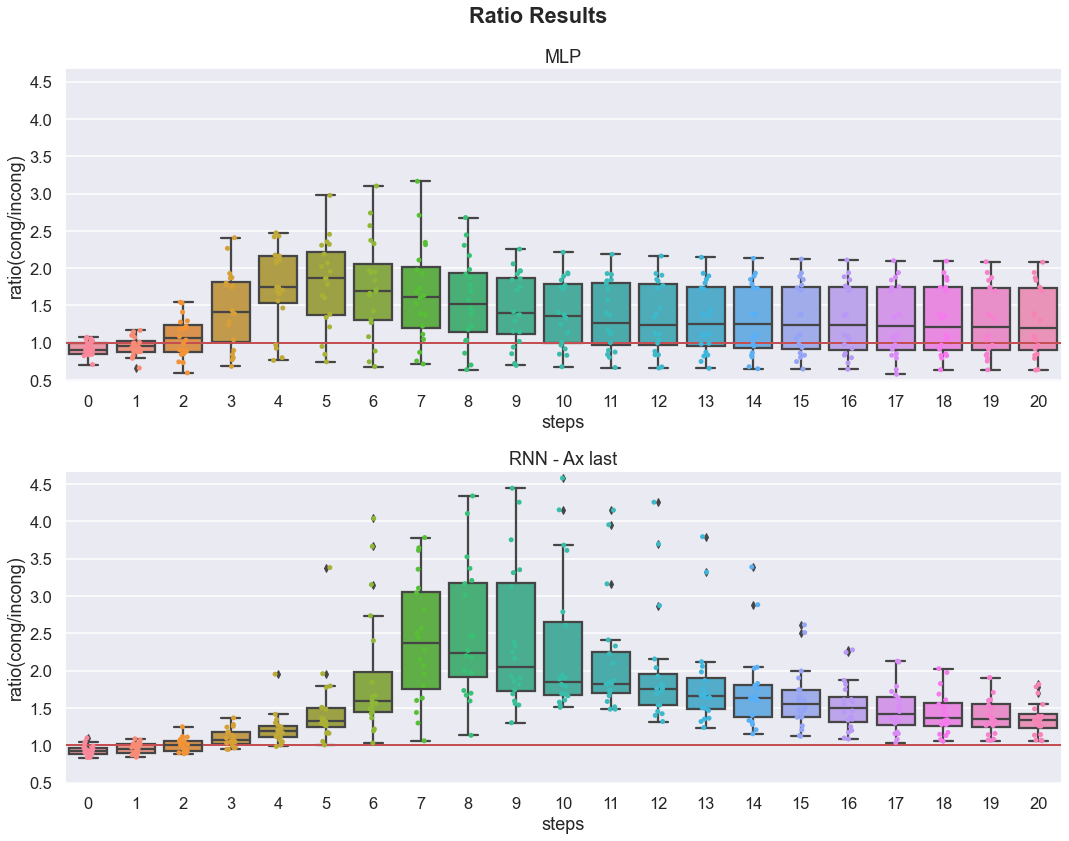

In [52]:
fig, axs = plt.subplots(2, 1, figsize=(15,12))
val_name = 'ratio(cong/incong)'
threshold = 1
# MLP
val = ratio_hidds_mlp
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('MLP')

# RNN
val = ratio_hidds_rnn
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('RNN - Ax %s' %(ctx_order))

for ax in axs:
    ax.axhline(y=threshold, color='r', linewidth=2)
    ax.set_ylim([mi,mx])

fig.suptitle('Ratio Results ', fontweight='bold')
plt.tight_layout()
fig_str = '%s_ratio_results_both_models_hidds' %(ctx_order_str)
fig.savefig(('../../figures/' + fig_str + '.jpg'), 
        bbox_inches = 'tight', pad_inches = 0)


# Inlcuding Stepwise MLP

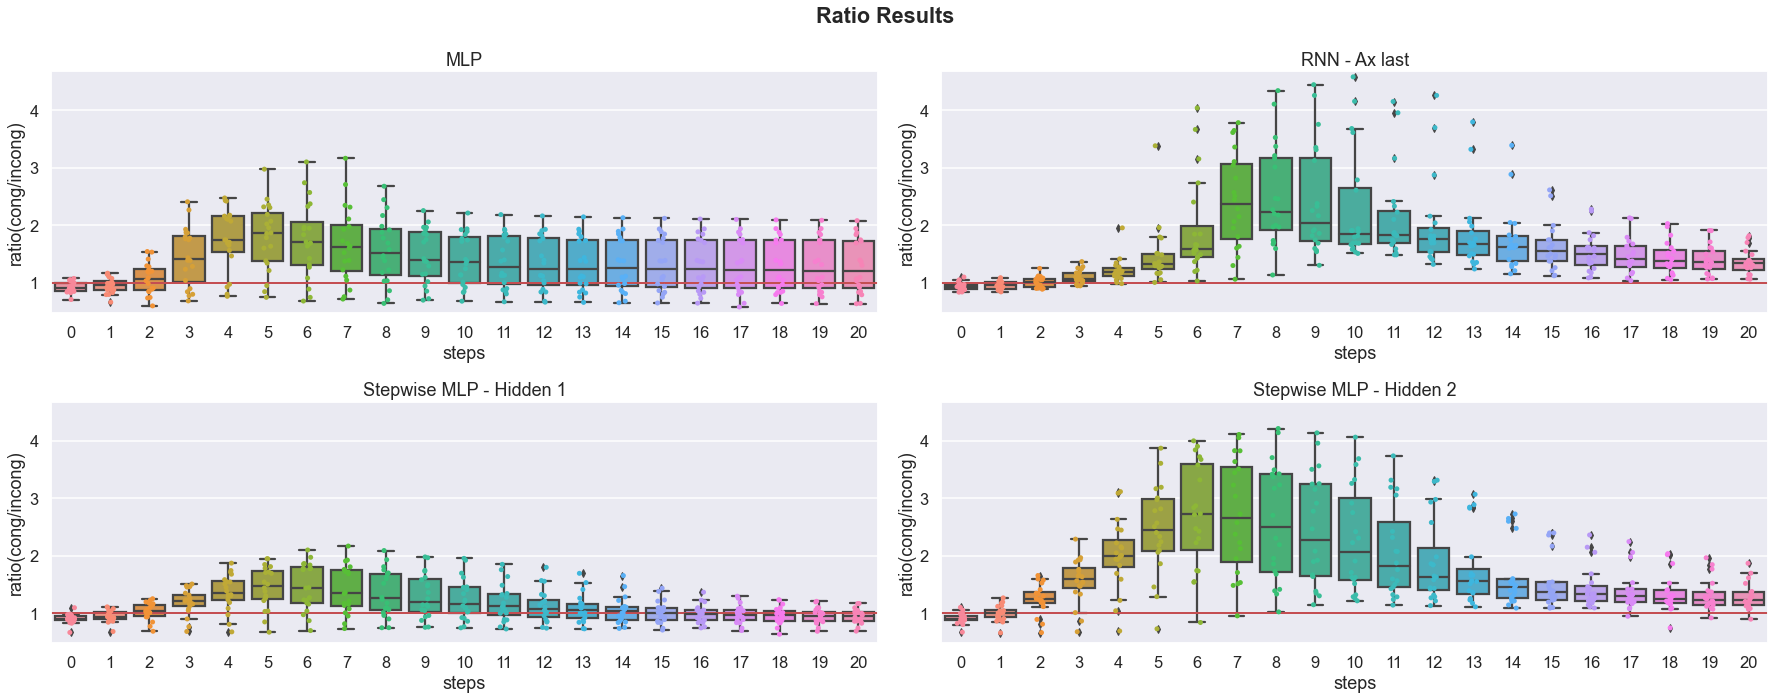

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(25,10))
val_name = 'ratio(cong/incong)'
threshold = 1
# MLP
val = ratio_hidds_mlp
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[0][0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('MLP')

# RNN
val = ratio_hidds_rnn
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[0][1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('RNN - Ax %s' %(ctx_order))

# MLP
# Hidden 1
val = ratio_hidds_swmlp[:,:,0]
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1][0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('Stepwise MLP - Hidden 1')

# MLP
# Hidden 2
val = ratio_hidds_swmlp[:,:,1]
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1][1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('Stepwise MLP - Hidden 2')
for ax in axs.flatten():
    ax.axhline(y=threshold, color='r', linewidth=2)
    ax.set_ylim([mi,mx])

fig.suptitle('Ratio Results ', fontweight='bold')
plt.tight_layout()
fig_str = '%s_ratio_results_three_models_hidds' %(ctx_order_str)
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
        bbox_inches = 'tight', pad_inches = 0)

In [46]:
ratio_hidds_rnncell.shape

(20, 31)

# Truncated backprob - RNN Cell

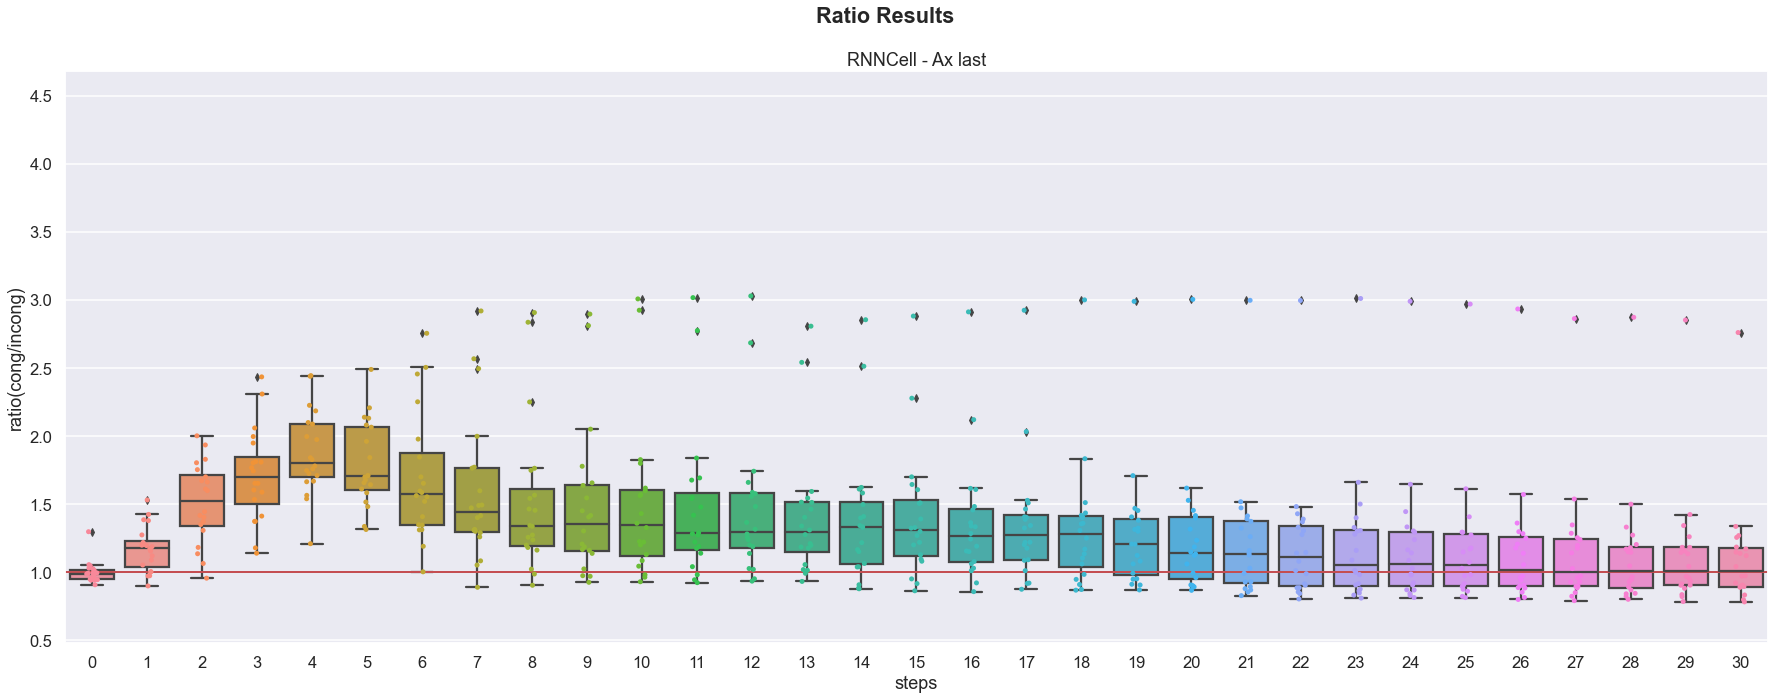

In [47]:
n_runs, checkpoints = ratio_hidds_rnncell.shape

fig, axs = plt.subplots(1, 1, figsize=(25,10))
val_name = 'ratio(cong/incong)'
threshold = 1

# RNN
val = ratio_hidds_rnncell
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs#[1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('RNNCell - Ax %s' %(ctx_order))


ax.axhline(y=threshold, color='r', linewidth=2)
ax.set_ylim([mi,mx])

fig.suptitle('Ratio Results ', fontweight='bold')
plt.tight_layout()
fig_str = '%s_ratio_results_rnncell_model_hidds' %(ctx_order_str)
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
        bbox_inches = 'tight', pad_inches = 0)
